# Merge, Join, and Concatenate

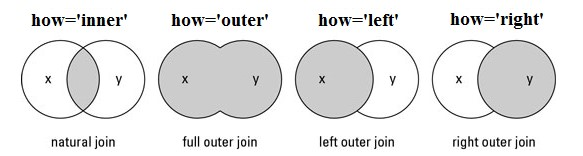

In [3]:
import pandas as pd

In [5]:
df1 = pd.read_csv(r"E:\learning\FREE Data Analyst Bootcamp\Python\Datasets\LOTR.csv")
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [8]:
df2 = pd.read_csv(r"E:\learning\FREE Data Analyst Bootcamp\Python\Datasets\LOTR 2.csv")
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [10]:
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [12]:
df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [14]:
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [16]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [28]:
df1.merge(df2, how = 'cross')
#cross mean take one and comper with all in other gruop

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [20]:
df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_Left',rsuffix = '_Right')

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN


In [22]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left',rsuffix = '_Right', how = 'outer')
df4

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [30]:
pd.concat([df1,df2], join = 'outer') 

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [24]:
pd.concat([df1,df2], join = 'outer', axis = 1)  

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


In [58]:
 pd.concat([df1,df2], axis = 0)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0
